In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import shutil
import librosa
import soundfile as sf
import random 
import math

In [2]:
with open('labels.txt','r') as f:
    file_lines = f.readlines()
    
dataframe = pd.DataFrame([string.split(',') for string in file_lines])


In [3]:
array = dataframe.to_numpy()
array.shape

(2764, 22)

In [4]:
position = np.argmax(array[10,:] == 'laughter')

print(position)

4


In [5]:
Fcounter = 0
Lcounter = 0

for i in range(1,2763):
    if np.argmax(array[i,:]=='laughter')!=0:
        Lcounter += 1
        if np.argmax(array[i,:] == 'Female')!=0:
            Fcounter = Fcounter +1 
    
print("NUMBER OF LAUGHTER EVENTS : " , Lcounter)
print("NUMBER OF FEMALE LAUGHTER EVENTS : " , Fcounter)
print("NUMBER OF MALE LAUGHTER EVENTS : " , Lcounter-Fcounter)
        

NUMBER OF LAUGHTER EVENTS :  935
NUMBER OF FEMALE LAUGHTER EVENTS :  527
NUMBER OF MALE LAUGHTER EVENTS :  408


In [6]:
tstart = []
tend = []

for i in range(1,2763):
    if np.argmax(array[i,:] == 'laughter')!=0:
        tstart.append(array[i,np.argmax(array[i,:] == 'laughter')+1])
        tend.append(array[i,np.argmax(array[i,:] == 'laughter')+2])
    
tstart = np.array(np.char.strip(tstart,'\n')).astype(np.float)
tend = np.array(np.char.strip(tend,'\n')).astype(np.float)


In [7]:
mean  = np.mean(tend-tstart)
print("mean = " , mean , 'senconds')

std = np.std(tend-tstart)
print("standard deviation = " , std , 'seconds')

mean =  0.9339978609625669 senconds
standard deviation =  0.6981486549299163 seconds


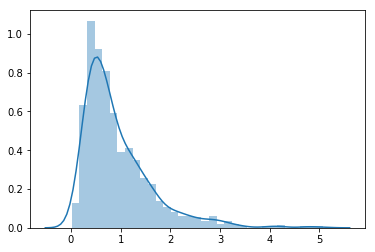

In [8]:
sns.distplot(tend - tstart)

In [9]:
tsegment = 1
toverlap = tsegment/2

In [14]:
counter = 0
for i in range(1,2763):
    if np.argmax(array[i,:] == 'laughter')!=0:
        tbegin = np.array(np.char.strip(array[i,np.argmax(array[i,:] == "laughter")+1],'\n')).astype(np.float)
        tfinish = np.array(np.char.strip(array[i,np.argmax(array[i,:] == "laughter")+2] ,'\n')).astype(np.float)
        
        if tfinish-tbegin>=tsegment:
            if i%100 == 0:
                print(i)
            audio_path  = 'data/S' + f'{i:04}' + '.wav'
            x,sr = librosa.load(audio_path , sr = None)
            n_segment = (((tfinish-tbegin)//toverlap)-1)
            for j in range(int(n_segment)):
                counter = counter + 1
                t1 = tbegin + j*toverlap
                t2 = t1 + tsegment
                sf.write( f'{counter}'+ ".wav" , x[int(t1*sr):int(t2*sr)] , sr) 
                
        
    print("TOTAL NUMBVER OF LAUGHTER FILES : " , counter)

TOTAL NUMBVER OF LAUGHTER FILES :  0
TOTAL NUMBVER OF LAUGHTER FILES :  1
TOTAL NUMBVER OF LAUGHTER FILES :  3
TOTAL NUMBVER OF LAUGHTER FILES :  3
TOTAL NUMBVER OF LAUGHTER FILES :  3
TOTAL NUMBVER OF LAUGHTER FILES :  4
TOTAL NUMBVER OF LAUGHTER FILES :  4
TOTAL NUMBVER OF LAUGHTER FILES :  4
TOTAL NUMBVER OF LAUGHTER FILES :  8
TOTAL NUMBVER OF LAUGHTER FILES :  9
TOTAL NUMBVER OF LAUGHTER FILES :  11
TOTAL NUMBVER OF LAUGHTER FILES :  13
TOTAL NUMBVER OF LAUGHTER FILES :  14
TOTAL NUMBVER OF LAUGHTER FILES :  14
TOTAL NUMBVER OF LAUGHTER FILES :  14
TOTAL NUMBVER OF LAUGHTER FILES :  14
TOTAL NUMBVER OF LAUGHTER FILES :  14
TOTAL NUMBVER OF LAUGHTER FILES :  14
TOTAL NUMBVER OF LAUGHTER FILES :  14
TOTAL NUMBVER OF LAUGHTER FILES :  16
TOTAL NUMBVER OF LAUGHTER FILES :  16
TOTAL NUMBVER OF LAUGHTER FILES :  16
TOTAL NUMBVER OF LAUGHTER FILES :  16
TOTAL NUMBVER OF LAUGHTER FILES :  16
TOTAL NUMBVER OF LAUGHTER FILES :  16
TOTAL NUMBVER OF LAUGHTER FILES :  17
TOTAL NUMBVER OF LAUGH

TOTAL NUMBVER OF LAUGHTER FILES :  65
TOTAL NUMBVER OF LAUGHTER FILES :  65
TOTAL NUMBVER OF LAUGHTER FILES :  65
TOTAL NUMBVER OF LAUGHTER FILES :  65
TOTAL NUMBVER OF LAUGHTER FILES :  65
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  66
TOTAL NUMBVER OF LAUGHTER FILES :  67
TOTAL NUMBVE

TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  120
TOTAL NUMBVER OF LAUGHTER FILES :  121
TOTAL NUMBVER OF LAUGHTER FILES :  121
TOTAL NUMBVER OF LAUGHTER FILES :  125
TOTAL NUMBVER OF LAUGHTER FILES :  125
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  128
TOTAL NUMBVER OF LAUGHTER FILES :  129
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  163
TOTAL NUMBVER OF LAUGHTER FILES :  163
TOTAL NUMBVER OF LAUGHTER FILES :  163
TOTAL NUMBVER OF LAUGHTER FILES :  163
TOTAL NUMBVER OF LAUGHTER FILES :  163
TOTAL NUMBVER OF LAUGHTER FILES :  164
TOTAL NUMBVER OF LAUGHTER FILES :  164
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER FILES :  165
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  192
TOTAL NUMBVER OF LAUGHTER FILES :  192
TOTAL NUMBVER OF LAUGHTER FILES :  192
TOTAL NUMBVER OF LAUGHTER FILES :  192
TOTAL NUMBVER OF LAUGHTER FILES :  195
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER FILES :  196
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  238
TOTAL NUMBVER OF LAUGHTER FILES :  238
TOTAL NUMBVER OF LAUGHTER FILES :  238
TOTAL NUMBVER OF LAUGHTER FILES :  238
TOTAL NUMBVER OF LAUGHTER FILES :  238
TOTAL NUMBVER OF LAUGHTER FILES :  238
TOTAL NUMBVER OF LAUGHTER FILES :  238
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER FILES :  239
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  286
TOTAL NUMBVER OF LAUGHTER FILES :  286
TOTAL NUMBVER OF LAUGHTER FILES :  286
TOTAL NUMBVER OF LAUGHTER FILES :  286
TOTAL NUMBVER OF LAUGHTER FILES :  289
TOTAL NUMBVER OF LAUGHTER FILES :  290
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER FILES :  291
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  342
TOTAL NUMBVER OF LAUGHTER FILES :  342
TOTAL NUMBVER OF LAUGHTER FILES :  344
TOTAL NUMBVER OF LAUGHTER FILES :  345
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  347
TOTAL NUMBVER OF LAUGHTER FILES :  348
TOTAL NUMBVER OF LAUGHTER FILES :  349
TOTAL NUMBVER OF LAUGHTER FILES :  349
TOTAL NUMBVER OF LAUGHTER FILES :  349
TOTAL NUMBVER OF LAUGHTER FILES :  349
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER FILES :  350
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  381
TOTAL NUMBVER OF LAUGHTER FILES :  382
TOTAL NUMBVER OF LAUGHTER FILES :  382
TOTAL NUMBVER OF LAUGHTER FILES :  384
TOTAL NUMBVER OF LAUGHTER FILES :  384
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  394
TOTAL NUMBVER OF LAUGHTER FILES :  399
TOTAL NUMBVER OF LAUGHTER FILES :  399
TOTAL NUMBVER OF LAUGHTER FILES :  399
TOTAL NUMBVER OF LAUGHTER FILES :  399
TOTAL NUMBVER OF LAUGHTER FILES :  399
TOTAL NUMBVER OF LAUGHTER FILES :  399
TOTAL NUMBVER OF LAUGHTER FILES :  399
TOTAL NUMBVER OF LAUGHTER FILES :  400
TOTAL NUMBVER OF LAUGHTER FILES :  400
TOTAL NUMBVER OF LAUGHTER FILES :  401
TOTAL NUMBVER OF LAUGHTER FILES :  403
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  447
TOTAL NUMBVER OF LAUGHTER FILES :  447
TOTAL NUMBVER OF LAUGHTER FILES :  449
TOTAL NUMBVER OF LAUGHTER FILES :  449
TOTAL NUMBVER OF LAUGHTER FILES :  449
TOTAL NUMBVER OF LAUGHTER FILES :  449
TOTAL NUMBVER OF LAUGHTER FILES :  454
TOTAL NUMBVER OF LAUGHTER FILES :  455
TOTAL NUMBVER OF LAUGHTER FILES :  455
TOTAL NUMBVER OF LAUGHTER FILES :  456
TOTAL NUMBVER OF LAUGHTER FILES :  456
TOTAL NUMBVER OF LAUGHTER FILES :  456
TOTAL NUMBVER OF LAUGHTER FILES :  458
TOTAL NUMBVER OF LAUGHTER FILES :  458
TOTAL NUMBVER OF LAUGHTER FILES :  458
TOTAL NUMBVER OF LAUGHTER FILES :  460
TOTAL NUMBVER OF LAUGHTER FILES :  460
TOTAL NUMBVER OF LAUGHTER FILES :  460
TOTAL NUMBVER OF LAUGHTER FILES :  460
TOTAL NUMBVER OF LAUGHTER FILES :  462
TOTAL NUMBVER OF LAUGHTER FILES :  465
TOTAL NUMBVER OF LAUGHTER FILES :  465
TOTAL NUMBVER OF LAUGHTER FILES :  466
TOTAL NUMBVER OF LAUGHTER FILES :  466
TOTAL NUMBVER OF LAUGHTER FILES :  469
TOTAL NUMBVER OF LAUGHTER

TOTAL NUMBVER OF LAUGHTER FILES :  563
TOTAL NUMBVER OF LAUGHTER FILES :  563
TOTAL NUMBVER OF LAUGHTER FILES :  563
TOTAL NUMBVER OF LAUGHTER FILES :  563
TOTAL NUMBVER OF LAUGHTER FILES :  564
TOTAL NUMBVER OF LAUGHTER FILES :  564
TOTAL NUMBVER OF LAUGHTER FILES :  565
TOTAL NUMBVER OF LAUGHTER FILES :  565
TOTAL NUMBVER OF LAUGHTER FILES :  565
TOTAL NUMBVER OF LAUGHTER FILES :  567
TOTAL NUMBVER OF LAUGHTER FILES :  569
TOTAL NUMBVER OF LAUGHTER FILES :  569
TOTAL NUMBVER OF LAUGHTER FILES :  569
TOTAL NUMBVER OF LAUGHTER FILES :  569
TOTAL NUMBVER OF LAUGHTER FILES :  570
TOTAL NUMBVER OF LAUGHTER FILES :  570
TOTAL NUMBVER OF LAUGHTER FILES :  570
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER FILES :  572
TOTAL NUMBVER OF LAUGHTER

In [25]:
Ntotal = 2763

In [27]:
counter = 0
while(counter<Ntotal):
    
    file = random.randint(1,2763)
    if np.argmax(array[file,:] ==  'laughter')!=0:
        counter = counter + 1
        
        tbegin = np.array(np.char.strip(array[file,np.argmax(array[file,:]=='laughter')+1],'\n')).astype(np.float)
        tend = np.array(np.char.strip(array[file,np.argmax(array[file,:]=='laughter')+2],'\n')).astype(np.float)
        audio_path  = 'data/S' + f'{file:04}'+".wav"
        x , sr = librosa.load(audio_path ,sr = None)
        
        t_1 = int(int(tbegin*sr)-1)
        t_2 = int(int(tend*sr)+2)
        t_3 = int(x.shape[0]-1)
        
        x_nonlaugh = np.concatenate((x[0:t_1], x[t_2:t_3]), axis = 0)
        size = x_nonlaugh.shape[0]/sr
        t1 = random.randint(0,int(size-tsegment))
        t2 = t1 + tsegment
        
        sf.write(f'{counter}' + '.wav', x[int(t1*sr):int(t2*sr)], sr)
        if counter % 10 == 0:
            print('Segmenting counter = ', counter)
            
print(counter)

Segmenting counter =  10
Segmenting counter =  20
Segmenting counter =  30
Segmenting counter =  40
Segmenting counter =  50
Segmenting counter =  60
Segmenting counter =  70
Segmenting counter =  80
Segmenting counter =  90
Segmenting counter =  100
Segmenting counter =  110
Segmenting counter =  120
Segmenting counter =  130
Segmenting counter =  140
Segmenting counter =  150
Segmenting counter =  160
Segmenting counter =  170
Segmenting counter =  180
Segmenting counter =  190
Segmenting counter =  200
Segmenting counter =  210
Segmenting counter =  220
Segmenting counter =  230
Segmenting counter =  240
Segmenting counter =  250
Segmenting counter =  260
Segmenting counter =  270
Segmenting counter =  280
Segmenting counter =  290
Segmenting counter =  300
Segmenting counter =  310
Segmenting counter =  320
Segmenting counter =  330
Segmenting counter =  340
Segmenting counter =  350
Segmenting counter =  360
Segmenting counter =  370
Segmenting counter =  380
Segmenting counter = 

In [28]:
tsegment = 0.5

In [29]:
counter = 0
while (counter < 616):
    counter = counter + 1
    
    file = random.randint(1,2763)
    t1 = random.randint(1,6)
    t2 = t1 + tsegment
    
    print('Segmenting counter = ', counter, 'File = ', file )
    
    audio_path = 'data/NonLaugh/' + f'{file}' + '.wav'
    x , sr = librosa.load(audio_path, sr=None)
    sf.write( f'{counter}' + '.wav', x[int(t1*sr):int(t2*sr)], sr)

Segmenting counter =  1 File =  1089


/home/deepanshu/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:146: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


FileNotFoundError: [Errno 2] No such file or directory: 'data/NonLaugh/1089.wav'